In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Load dataset
df = pd.read_excel("Pharmaceutical Supply Chain Optimization.xlsx")

In [ ]:
df.head()

,Drug,Demand_Forecast,Optimal_Stock_Level,Restocking_Strategy
0,Metformin,7750,4753,Monthly
1,Lisinopril,5136,9965,Quarterly
2,Metformin,3183,2933,Monthly
3,Insulin,2332,3927,Monthly
4,Atorvastatin,3522,6812,Monthly


In [ ]:
df.shape

(100000, 4)

In [ ]:
df.columns

Index(['Drug', 'Demand_Forecast', 'Optimal_Stock_Level',
       'Restocking_Strategy'],
      dtype='object')

In [ ]:
numeric_cols = ['Optimal_Stock_Level']
cat_cols = ['Drug', 'Restocking_Strategy']

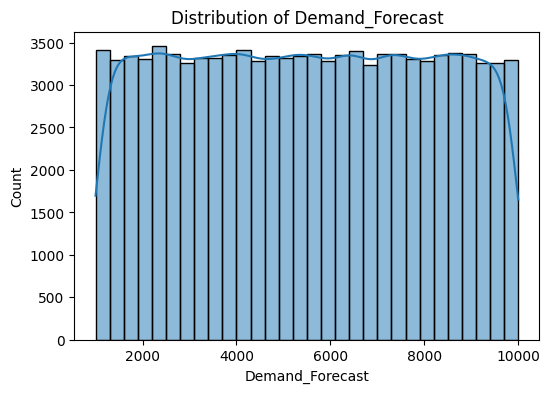

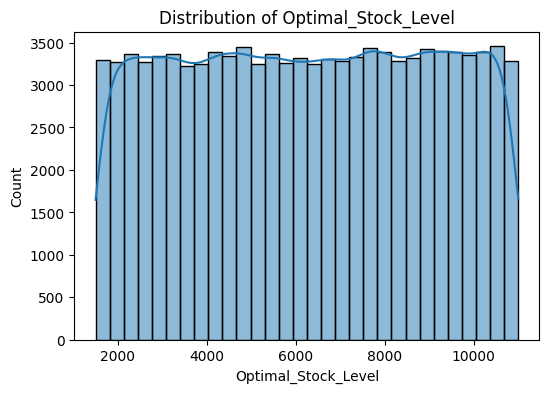

In [ ]:
# Distribution plots for numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

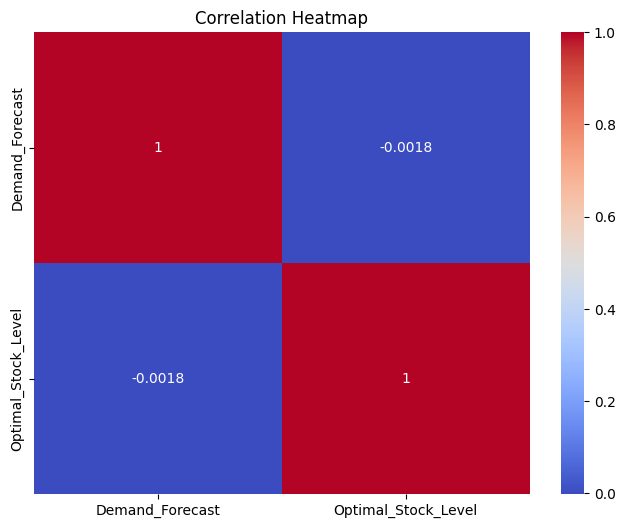

In [ ]:
#Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

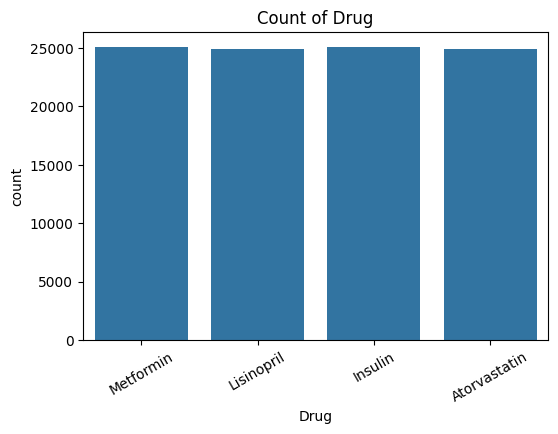

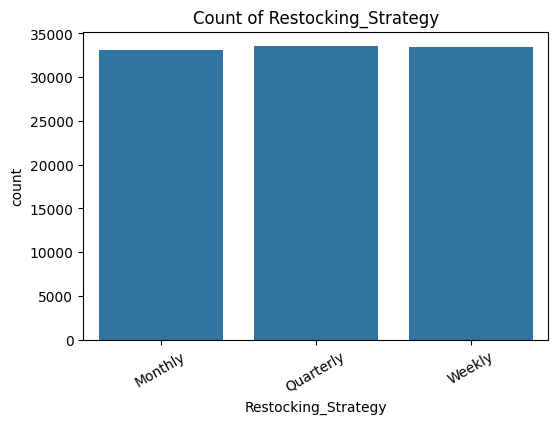

In [ ]:
#Count plots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.xticks(rotation=30)
    plt.show()

In [ ]:
# Separate features and target
X = df.drop(columns=["Demand_Forecast"])
y = df["Demand_Forecast"]

In [ ]:
# Handle missing values manually
for col in numeric_cols:
    X[col].fillna(X[col].median())

for col in cat_cols:
    X[col].fillna(X[col].mode()[0])

In [ ]:
# Encode categorical variables manually
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2598.9810892002547


In [ ]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [ ]:
rmse_gb = sqrt(mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", rmse_gb)

Gradient Boosting RMSE: 2600.6243700602276
